In [14]:
using FuzzyClusteringSimilarity
using Statistics
using Plots

## Make Data

In [2]:
unevenLowFuzzy = [[0.95, 0.025, 0.025] [0.98, 0.01, 0.01] [0.96, 0.02, 0.02] [0.95, 0.04, 0.01]   [0.95, 0.01, 0.04] [0.99, 0.005, 0.005] [0.025, 0.95, 0.025] [0.97, 0.02, 0.01] [0.025, 0.025, 0.95] ]
evenLowFuzzy   = [[0.95, 0.025, 0.025] [0.98, 0.01, 0.01] [0.96, 0.02, 0.02] [0.025, 0.95, 0.025] [0.02, 0.96, 0.02] [0.01, 0.98, 0.01]   [0.05, 0.05, 0.95]   [0.02, 0.02, 0.96] [0.01, 0.01, 0.98]   ]  
highFuzzy      = [[0.34, 0.33, 0.33] [0.36, 0.32, 0.32] [0.40, 0.25, 0.35] [0.33, 0.34, 0.33] [0.32, 0.32, 0.36] [0.25, 0.40, 0.35] [0.33, 0.33, 0.34] [0.32, 0.32, 0.36] [0.35, 0.40, 0.25] ]
unevenHard     = [[1, 0, 0] [1, 0, 0] [1, 0, 0] [1, 0, 0] [1, 0, 0] [1, 0, 0] [0, 1, 0] [1, 0, 0] [0, 0, 1] ]
evenHard       = [[1, 0, 0] [1, 0, 0] [1, 0, 0] [0, 1, 0] [0, 1, 0] [0, 1, 0] [0, 0, 1] [0, 0, 1] [0, 0, 1] ]

3×9 Matrix{Int64}:
 1  1  1  0  0  0  0  0  0
 0  0  0  1  1  1  0  0  0
 0  0  0  0  0  0  1  1  1

## Comparisons

In [8]:
permutation = [
    andc(unevenLowFuzzy, evenLowFuzzy, "perm"),
    andc(unevenLowFuzzy, highFuzzy, "perm"),
    andc(unevenLowFuzzy, unevenHard, "perm"),
    andc(unevenLowFuzzy, evenHard, "perm"),
    andc(evenLowFuzzy, highFuzzy, "perm"),
    andc(evenLowFuzzy, unevenHard, "perm"),
    andc(evenLowFuzzy, evenHard, "perm"),
    andc(highFuzzy, unevenHard, "perm"),
    andc(highFuzzy, evenHard, "perm"),
    andc(unevenHard, evenHard, "perm")
]

fitted = [
    andc(unevenLowFuzzy, evenLowFuzzy, "fit"),
    andc(unevenLowFuzzy, highFuzzy, "fit"),
    andc(unevenLowFuzzy, unevenHard, "fit"),
    andc(unevenLowFuzzy, evenHard, "fit"),
    andc(evenLowFuzzy, highFuzzy, "fit"),
    andc(evenLowFuzzy, unevenHard, "fit"),
    andc(evenLowFuzzy, evenHard, "fit"),
    andc(highFuzzy, unevenHard, "fit"),
    andc(highFuzzy, evenHard, "fit"),
    andc(unevenHard, evenHard, "fit")
]

symmetric = [
    andc(unevenLowFuzzy, evenLowFuzzy, "sym"),
    andc(unevenLowFuzzy, highFuzzy,"sym"),
    andc(unevenLowFuzzy, unevenHard,"sym"),
    andc(unevenLowFuzzy, evenHard,"sym"),
    andc(evenLowFuzzy, highFuzzy,"sym"),
    andc(evenLowFuzzy, unevenHard,"sym"),
    andc(evenLowFuzzy, evenHard,"sym"),
    andc(highFuzzy, unevenHard,"sym"),
    andc(highFuzzy, evenHard,"sym"),
    andc(unevenHard, evenHard,"sym")
]

flat = [
    andc(unevenLowFuzzy, evenLowFuzzy, "flat"),
    andc(unevenLowFuzzy, highFuzzy, "flat"),
    andc(unevenLowFuzzy, unevenHard, "flat"),
    andc(unevenLowFuzzy, evenHard, "flat"),
    andc(evenLowFuzzy, highFuzzy, "flat"),
    andc(evenLowFuzzy, unevenHard, "flat"),
    andc(evenLowFuzzy, evenHard, "flat"),
    andc(highFuzzy, unevenHard, "flat"),
    andc(highFuzzy, evenHard, "flat"),
    andc(unevenHard, evenHard, "flat")
]

unadjusted = [
    ndc(unevenLowFuzzy, evenLowFuzzy),
    ndc(unevenLowFuzzy, highFuzzy),
    ndc(unevenLowFuzzy, unevenHard),
    ndc(unevenLowFuzzy, evenHard),
    ndc(evenLowFuzzy, highFuzzy),
    ndc(evenLowFuzzy, unevenHard),
    ndc(evenLowFuzzy, evenHard),
    ndc(highFuzzy, unevenHard),
    ndc(highFuzzy, evenHard),
    ndc(unevenHard, evenHard)
]

10-element Vector{Float64}:
 0.533888888888889
 0.61375
 0.9615277777777778
 0.48958333333333326
 0.3254166666666668
 0.5051388888888888
 0.954861111111111
 0.5777777777777777
 0.28166666666666673
 0.5

In [9]:
sortedFlat = sortperm(flat, rev=true)
sortedFit = sortperm(fitted, rev=true)
sortedPerm = sortperm(permutation, rev=true)
sortedSym = sortperm(symmetric, rev=true)
sortedUnadjusted = sortperm(unadjusted, rev=true)

print("NDC")
print("   ")
print("Perm")
print("   ")
print("Fit")
print("   ")
print("Sym")
print("   ")
println("Flat")
for i in 1:10
    print(sortedUnadjusted[i])
    print("      ")
    print(sortedPerm[i])
    print("      ")
    print(sortedFit[i])
    print("      ")
    print(sortedSym[i])
    print("      ")
    println(sortedFlat[i])
end

NDC   Perm   Fit   Sym   Flat
3      3      3      3      3
7      7      7      7      7
2      1      10      8      2
8      6      6      2      8
1      10      4      6      1
6      4      2      4      6
10      2      8      9      10
4      8      9      10      4
5      5      5      5      5
9      9      1      1      9


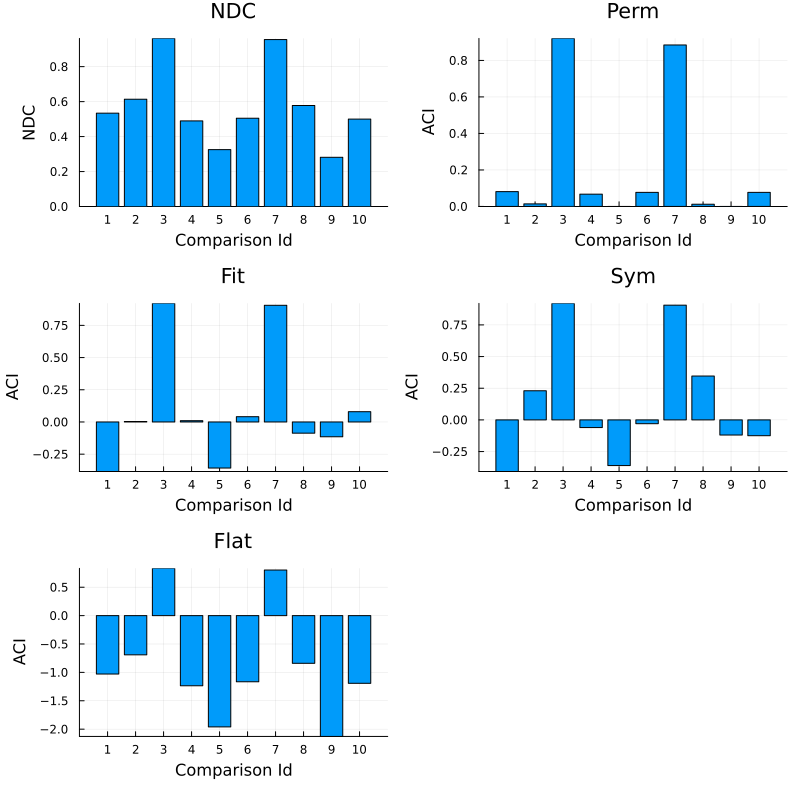

In [12]:
p = Plots.plot(size = (800, 800), layout=grid(3,2, widths=[0.5, 0.5, 0.5, 0.5, 0.5], heights=[0.33, 0.33, 0.33, 0.33, 0.33]), title=["NDC" "Perm" "Fit" "Sym" "Flat"])
Plots.bar!(unadjusted, subplot=1, legend=false, xticks=1:10, xlabel="Comparison Id", ylabel="NDC")
Plots.bar!(permutation, subplot=2, legend=false, xticks=1:10, xlabel="Comparison Id", ylabel="ACI")
Plots.bar!(fitted, subplot=3, legend=false, xticks=1:10, xlabel="Comparison Id", ylabel="ACI")
Plots.bar!(symmetric, subplot=4, legend=false, xticks=1:10, xlabel="Comparison Id", ylabel="ACI")
Plots.bar!(flat, subplot=5, legend=false, xticks=1:10, xlabel="Comparison Id", ylabel="ACI")
Plots.plot!(subplot=6, legend=false,grid=false,foreground_color_subplot=:white) 
#Plots.savefig("ACIBarCharts.png")

## Correlation Matrix Excluding Comparisons 3 and 7

In [15]:
function remove37(vect)
    new = deepcopy(vect)
    deleteat!(new, 3)
    deleteat!(new, 6)
    return new
end

permM2 = remove37(permutation)
fitM2 = remove37(fitted)
symM2 = remove37(symmetric)
flatM2 = remove37(flat)

correlations = zeros(4,4)
correlations[1, 2] = cor(permM2, fitM2)
correlations[1, 3] = cor(permM2, symM2)
correlations[1, 4] = cor(permM2, flatM2)
correlations[2, 3] = cor(fitM2, symM2)
correlations[2, 4] = cor(fitM2, flatM2)
correlations[3, 4] = cor(symM2, flatM2)

correlations

4×4 Matrix{Float64}:
 0.0  0.235034  -0.294896  0.395286
 0.0  0.0        0.635035  0.347319
 0.0  0.0        0.0       0.559407
 0.0  0.0        0.0       0.0

In [16]:
withColourColumn = vcat(highFuzzy, transpose(1:9))

t = transpose(withColourColumn)
C = makecpt(cmap=(:red, :darkorange1, :yellow, :green, :navyblue, :blue, :magenta, :purple, :pink), range=1:10, no_bg=true)

ternary(t, region=(0,1,0,1,0,1), vertex_labels="Cluster1/Cluster2/Cluster3", marker=:p, cmap=C, markersize=0.25,
frame=(annot=:false, alabel=" ", blabel=" ",
       clabel=" ", fill=:gray95, title="UnevenLowFuzzy"), ) #savefig="highFuzzy.png")

LoadError: UndefVarError: `makecpt` not defined